In [1454]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [1455]:
# Loading and reading the file (Titanic dataset)
test = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")
gender = pd.read_csv("gender_submission.csv")

## Information about the data ##


In [1456]:
# previewing the train data
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [1457]:
print('The number of samples in the train data is {}.'.format(train.shape[0]))

The number of samples in the train data is 891.


In [1458]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [1459]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [1460]:
# previewing the test data
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [1461]:
print('The number of samples in the test data is {}.'.format(test.shape[0]))

The number of samples in the test data is 418.


In [1462]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [1463]:
# previewing the gender data
gender

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [1464]:
# inserting the survived column into the test data
test.insert(1, 'Survived', gender['Survived'])
# previewing the test data after inserting the survived column
test

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


## Missing values ##

### TRAIN data ###

In [1465]:
# checking missing values in the train data
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Looking at the information above, we can see that there are some missing values in the 'Age', 'Cabin' and 'Embarked' columns.

### Age ###

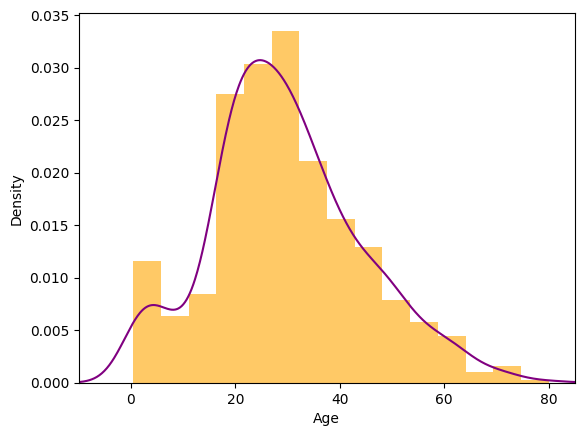

In [1466]:
ax = train["Age"].hist(bins=15, density=True, stacked=True, color='orange', alpha=0.6)
train["Age"].plot(kind='density', color='purple')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

Since "Age" is right skewed, I will be using the median to replace missing values, as using the mean might give biased results by filling in ages that are older than desired.

In [1467]:
# median of age
print('The median of "Age" is %.2f' %(train["Age"].median(skipna=True)))

The median of "Age" is 28.00


### Cabin ###

In [1468]:
# percentage of missing "Cabin" 
print('Percentage of missing "Cabin" records is %.2f%%' %((train['Cabin'].isnull().sum()/train.shape[0])*100))

train['Cabin'].unique()

Percentage of missing "Cabin" records is 77.10%


array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

The 'Cabin' column has too many different types of values and the percentage of missing values is also quite high (77.10%). Thus, this column will be dropped and not taken into account for the model. 


### Embarked ###

Boarded passengers grouped by port of embarkation (S = Southampton, C = Cherbourg, Q = Queenstown):
S    644
C    168
Q     77
Name: Embarked, dtype: int64


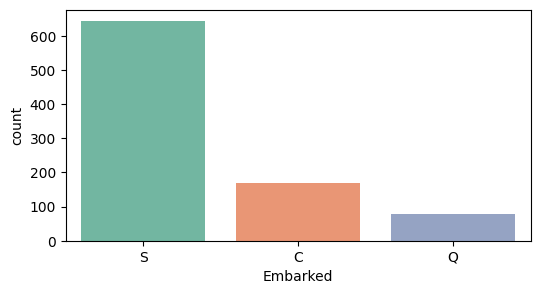

The most common boarding port of embarkation is S.


In [1469]:
print('Boarded passengers grouped by port of embarkation (S = Southampton, C = Cherbourg, Q = Queenstown):')
print(train['Embarked'].value_counts())
plt.figure(figsize=(6,3))
sns.countplot(x='Embarked', data=train, palette='Set2')
plt.show()

print('The most common boarding port of embarkation is %s.' %train['Embarked'].value_counts().idxmax())

Based on the assessment of the missing values in the dataset, the following changes to the data will be made:

If "Age" is missing for a given row, it will be replaced with 28 (median age).

If "Embarked" is missing for a riven row, it will be replaced with "S" (the most common boarding port).

The "Cabin" column will be dropped.

In [1470]:
# replacing missing values in the "Age" column
train_data = train.copy()
train_data["Age"].fillna(train["Age"].median(skipna=True), inplace=True) #using the median (28.00) 

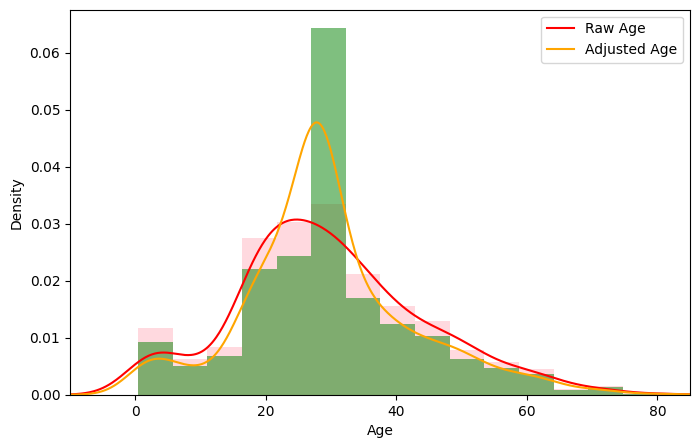

In [1471]:
plt.figure(figsize=(8,5))
ax = train["Age"].hist(bins=15, density=True, stacked=True, color='pink', alpha=0.6)
train["Age"].plot(kind='density', color='red')
ax = train_data["Age"].hist(bins=15, density=True, stacked=True, color='green', alpha=0.5)
train_data["Age"].plot(kind='density', color='orange')
ax.legend(['Raw Age', 'Adjusted Age'])
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

In [1472]:
# replacing missing values in the "Embarked" column
train_data["Embarked"].fillna(train['Embarked'].value_counts().idxmax(), inplace=True) #using the most common boarding point of embarkation

In [1473]:
# dropping the "Cabin" column
train_data.drop('Cabin', axis=1, inplace=True)

In [1474]:
# checking missing values in the adjusted train data
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Other features to consider ###

sibsp	# of siblings / spouses aboard the Titanic

parch	# of parents / children aboard the Titanic

In [1475]:
# before further changes
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [1476]:
# creating only two numerical variables (0-1) for travelling alone to reduce the dimensionality of the dataset
train_data['TravelAlone']=np.where((train_data["SibSp"]+train_data["Parch"])>0, 0, 1)

# dropping the "SibSp" and "Parch" columns
train_data.drop('SibSp', axis=1, inplace=True)
train_data.drop('Parch', axis=1, inplace=True)

In [1477]:
# after the changes
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,TravelAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,1


In [1478]:
# encoding the "Embarked" and "Sex" columns, as they are categorical values
train_data = pd.get_dummies(train_data,
                         prefix={'Sex':'Sex'},
                         columns=["Sex"],
                         drop_first=True)

train_data = pd.get_dummies(train_data,
                         prefix={'Embarked':'Embarked'},
                         columns=["Embarked"],
                         drop_first=False) # One Hot Encoder

In [1479]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Age,Ticket,Fare,TravelAlone,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,A/5 21171,7.2500,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,PC 17599,71.2833,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,STON/O2. 3101282,7.9250,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,113803,53.1000,0,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,373450,8.0500,1,1,0,0,1


In [1480]:
# dropping some columns that will not be considered to train the model
train_data.drop('Name', axis=1, inplace=True)
train_data.drop('Ticket', axis=1, inplace=True)

final_train = train_data
final_train.head()

,PassengerId,Survived,Pclass,Age,Fare,TravelAlone,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,7.2500,0,1,0,0,1
1,2,1,1,38.0,71.2833,0,0,1,0,0
2,3,1,3,26.0,7.9250,1,0,0,0,1
3,4,1,1,35.0,53.1000,0,0,0,0,1
4,5,0,3,35.0,8.0500,1,1,0,0,1


### TEST data ###

In this part, I will follow a similar process as above but with the Test data.

In [1481]:
# checking missing values in the test data
test.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Looking at the information above, we can see that in this case there are some missing values in the 'Age', 'Fare' and 'Cabin' columns.

### Age ###

In [1482]:
# replacing missing values in the "Age" column
test_data = test.copy()
test_data["Age"].fillna(train["Age"].median(skipna=True), inplace=True)

### Fare ###

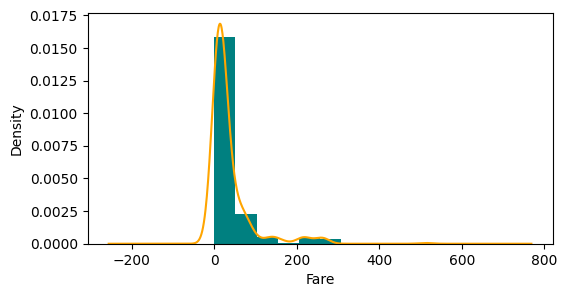

In [1483]:
# histogram of the "Fare" column
fig, ax = plt.subplots(figsize=(6, 3))

plt.hist(test_data['Fare'], bins=10, density=True,stacked=True, color='teal', alpha=1)
test_data["Fare"].plot(kind='density', color='orange')
ax.set(xlabel='Fare')

plt.show()

In [1484]:
# replacing the missing values in the "Fare" column with the median
test_data["Fare"].fillna(train["Fare"].median(skipna=True), inplace=True)

### Cabin ###

In [1485]:
# dropping the "Cabin" column
test_data.drop('Cabin', axis=1, inplace=True)

In [1486]:
# checking missing values in the adjusted test data
test_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Other features to consider ###

In [1487]:
# creating only two numerical variables (0-1) for travelling alone to reduce the dimensionality of the dataset
test_data['TravelAlone']=np.where((test_data["SibSp"]+test_data["Parch"])>0, 0, 1)

# dropping the "SibSp" and "Parch" columns
test_data.drop('SibSp', axis=1, inplace=True)
test_data.drop('Parch', axis=1, inplace=True)

In [1488]:
# encoding the "Embarked" and "Sex" columns, as they are categorical values
test_data = pd.get_dummies(test_data,
                         prefix={'Sex':'Sex'},
                         columns=["Sex"],
                         drop_first=True)

test_data = pd.get_dummies(test_data,
                         prefix={'Embarked':'Embarked'},
                         columns=["Embarked"],
                         drop_first=False) # One Hot Encoder

In [1489]:
# dropping some columns that will not be considered to train the model
test_data.drop('Name', axis=1, inplace=True)
test_data.drop('Ticket', axis=1, inplace=True)

final_test = test_data
final_test.head()

,PassengerId,Survived,Pclass,Age,Fare,TravelAlone,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,0,3,34.5,7.8292,1,1,0,1,0
1,893,1,3,47.0,7.0000,0,0,0,0,1
2,894,0,2,62.0,9.6875,1,1,0,1,0
3,895,0,3,27.0,8.6625,1,1,0,0,1
4,896,1,3,22.0,12.2875,0,0,0,0,1


## Exploratory Data Analysis ##


In [1490]:
# correlation Matrix
corr_mat = final_train.corr(numeric_only=True)
corr_mat

,PassengerId,Survived,Pclass,Age,Fare,TravelAlone,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,1.000000,-0.005007,-0.035144,0.034212,0.012658,0.057462,0.042939,-0.001205,-0.033606,0.022204
Survived,-0.005007,1.000000,-0.338481,-0.064910,0.257307,-0.203367,-0.543351,0.168240,0.003650,-0.149683
Pclass,-0.035144,-0.338481,1.000000,-0.339898,-0.549500,0.135207,0.131900,-0.243292,0.221009,0.074053
Age,0.034212,-0.064910,-0.339898,1.000000,0.096688,0.171647,0.081163,0.030248,-0.031415,-0.006729
Fare,0.012658,0.257307,-0.549500,0.096688,1.000000,-0.271832,-0.182333,0.269335,-0.117216,-0.162184
TravelAlone,0.057462,-0.203367,0.135207,0.171647,-0.271832,1.000000,0.303646,-0.095298,0.086464,0.029074
Sex_male,0.042939,-0.543351,0.131900,0.081163,-0.182333,0.303646,1.000000,-0.082853,-0.074115,0.119224
Embarked_C,-0.001205,0.168240,-0.243292,0.030248,0.269335,-0.095298,-0.082853,1.000000,-0.148258,-0.782742
Embarked_Q,-0.033606,0.003650,0.221009,-0.031415,-0.117216,0.086464,-0.074115,-0.148258,1.000000,-0.499421
Embarked_S,0.022204,-0.149683,0.074053,-0.006729,-0.162184,0.029074,0.119224,-0.782742,-0.499421,1.000000


<AxesSubplot: >

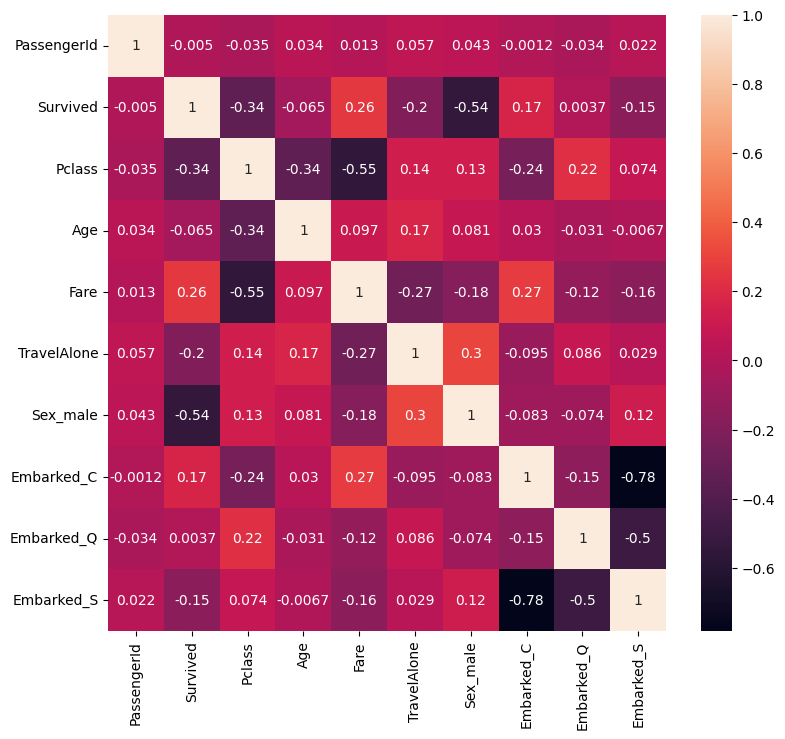

In [1491]:
# heatmap
fig, ax = plt.subplots(figsize=(9,8))
sns.heatmap(corr_mat, annot=True)

### Age ###

In [1492]:
# creating bins for the values in the "Age" column
final_train['Age_bins'] = np.where((final_train["Age"])<18, "children", np.where((final_train["Age"])>65,"seniors","adults"))
count_age = final_train.groupby(['Age_bins'])['PassengerId'].count().to_frame('count').reset_index()
count_age

,Age_bins,count
0,adults,770
1,children,113
2,seniors,8


Children = <18; 
Adults = 19-64; 
Seniors = >65

<AxesSubplot: title={'center': 'Pie chart by age group'}, ylabel='count'>

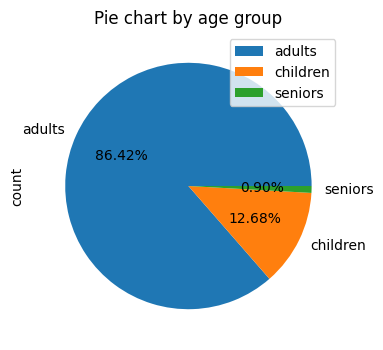

In [1493]:
# creating a pie chart for the "Age" bins
fig, ax = plt.subplots(figsize = (6,4))
count_age.plot(kind = 'pie', y = 'count', labels = count_age['Age_bins'], title = "Pie chart by age group", autopct = '%1.2f%%', ax=ax)

Text(0.5, 1.0, 'Age barplot for the Population who Survived and Died on the Titanic')

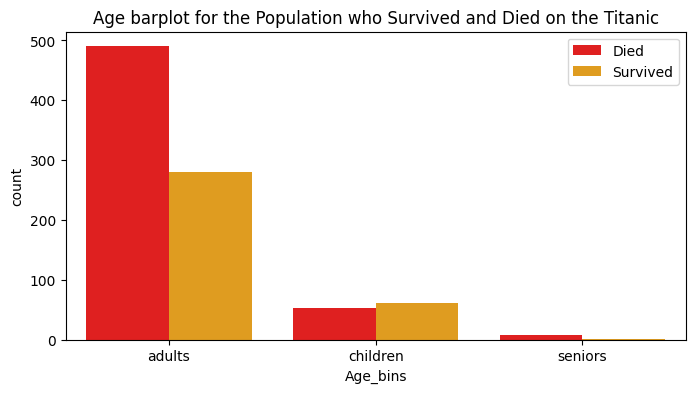

In [1494]:
# creating an age barplot
ax = plt.figure(figsize=(8,4))
ax = sns.countplot(data=final_train, x=final_train["Age_bins"],hue="Survived",palette=["red","orange"])
plt.legend(['Died', 'Survived'])
plt.title('Age barplot for the Population who Survived and Died on the Titanic')

More children survived than died, while more adults and elderly people died than survived.

Text(0.5, 1.0, 'Age Density Distribution for the Population who Survived and Died on the Titanic')

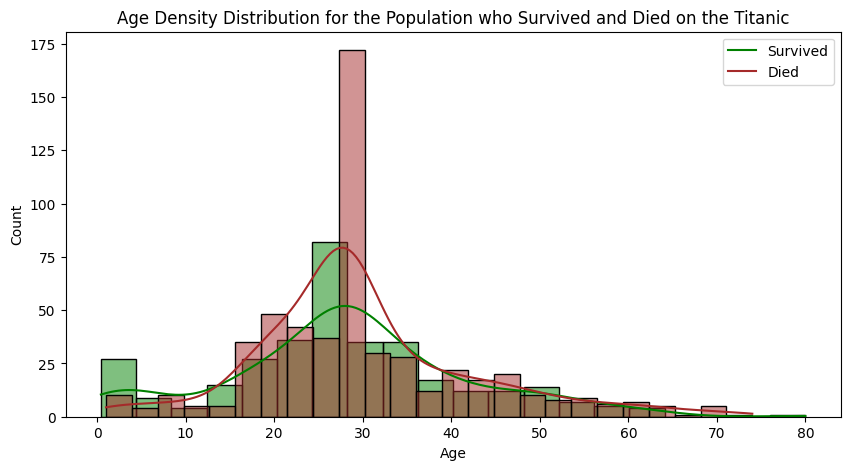

In [1495]:
# representing the age density distribution for the population (survived/died)
plt.figure(figsize=(10,5))
ax = sns.histplot(final_train["Age"][final_train.Survived == 1], color="green", kde=True)
sns.histplot(final_train["Age"][final_train.Survived == 0], color="brown", kde=True)
plt.legend(['Survived', 'Died'])
plt.title('Age Density Distribution for the Population who Survived and Died on the Titanic')

### TravelAlone ###

In [1496]:
final_train.groupby(['TravelAlone','Survived'])['PassengerId'].count().to_frame('count').reset_index()


,TravelAlone,Survived,count
0,0,0,175
1,0,1,179
2,1,0,374
3,1,1,163


In [1497]:
# creating categorical groups for TravelAlone
final_train['TravelAloneF']=np.where((final_train["TravelAlone"])==1, "Alone", "Accompanied") 
final_train.head()

,PassengerId,Survived,Pclass,Age,Fare,TravelAlone,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Age_bins,TravelAloneF
0,1,0,3,22.0,7.2500,0,1,0,0,1,adults,Accompanied
1,2,1,1,38.0,71.2833,0,0,1,0,0,adults,Accompanied
2,3,1,3,26.0,7.9250,1,0,0,0,1,adults,Alone
3,4,1,1,35.0,53.1000,0,0,0,0,1,adults,Accompanied
4,5,0,3,35.0,8.0500,1,1,0,0,1,adults,Alone


Text(0.5, 0, 'Ways of Travelling')

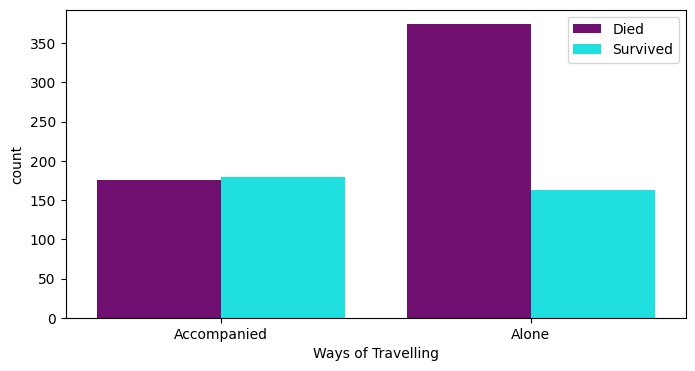

In [1498]:
ax = plt.figure(figsize=(8,4))
ax = sns.countplot(data=final_train, x=final_train["TravelAloneF"],hue="Survived",palette=["purple","cyan"])
plt.legend(['Died', 'Survived'])
plt.xlabel('Ways of Travelling')

People who were travelling alone died more than people who were travelling accompanied, although at the same time there was an equal number of people who survived and people who died that were travelling accompanied.

### Sex ###

Text(0.5, 0, 'Ways of Travelling')

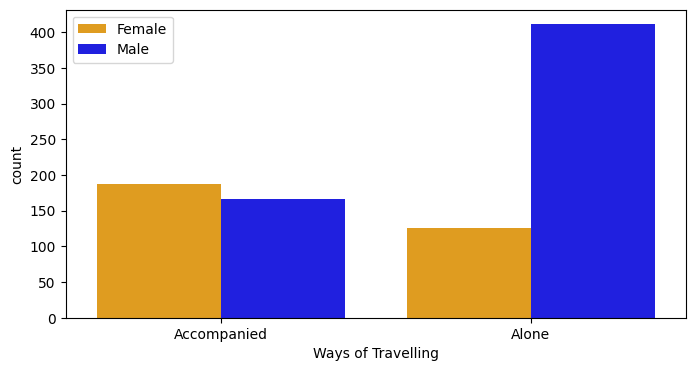

In [1499]:
# creating a barplot to visualise the number of males and females and the way they were travelling
ax = plt.figure(figsize=(8,4))
ax=sns.countplot(data=final_train, x=final_train["TravelAloneF"],hue="Sex_male",palette=["orange","blue"])
plt.legend(['Female', 'Male'])
plt.xlabel('Ways of Travelling')

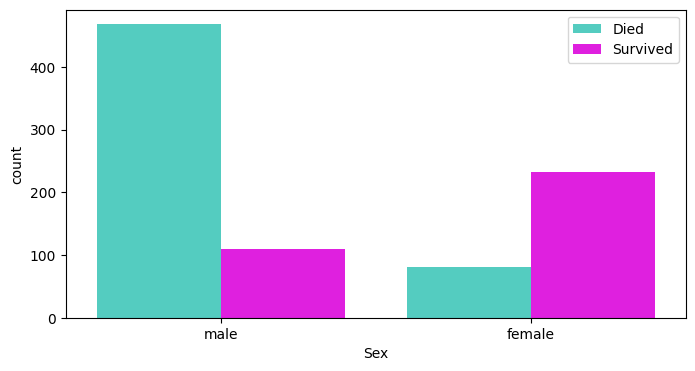

In [1500]:
# creating a barplot to visualise the number of males and females who survived/died
ax = plt.figure(figsize=(8,4))
ax = sns.countplot(data=final_train, x=train["Sex"],hue="Survived",palette=["turquoise","magenta"])
plt.legend(['Died', 'Survived'])


The graph shows a significant difference in the number of male and female fatalities, the former being exponentially higher.

### Embarked Port, Class and Fare ###

In [1501]:
train.groupby(['Embarked','Survived'])['PassengerId'].count().to_frame('count').reset_index()


,Embarked,Survived,count
0,C,0,75
1,C,1,93
2,Q,0,47
3,Q,1,30
4,S,0,427
5,S,1,217


Text(0.5, 1.0, 'Class barplot for the Population who Survived and Died on the Titanic')

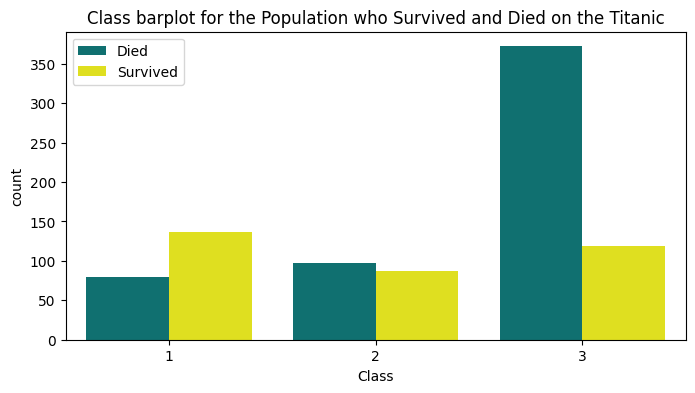

In [1502]:
ax = plt.figure(figsize=(8,4))
ax=sns.countplot(data=final_train, x=final_train["Pclass"],hue="Survived",palette=["teal","yellow"])
plt.legend(['Died', 'Survived'])
plt.xlabel('Class')
plt.title('Class barplot for the Population who Survived and Died on the Titanic')

C:\Users\mcd_m\AppData\Local\Temp\ipykernel_3108\4015755469.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(final_train["Fare"][final_train.Survived == 1], color="red", shade=True)
C:\Users\mcd_m\AppData\Local\Temp\ipykernel_3108\4015755469.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(final_train["Fare"][final_train.Survived == 0], color="cyan", shade=True)


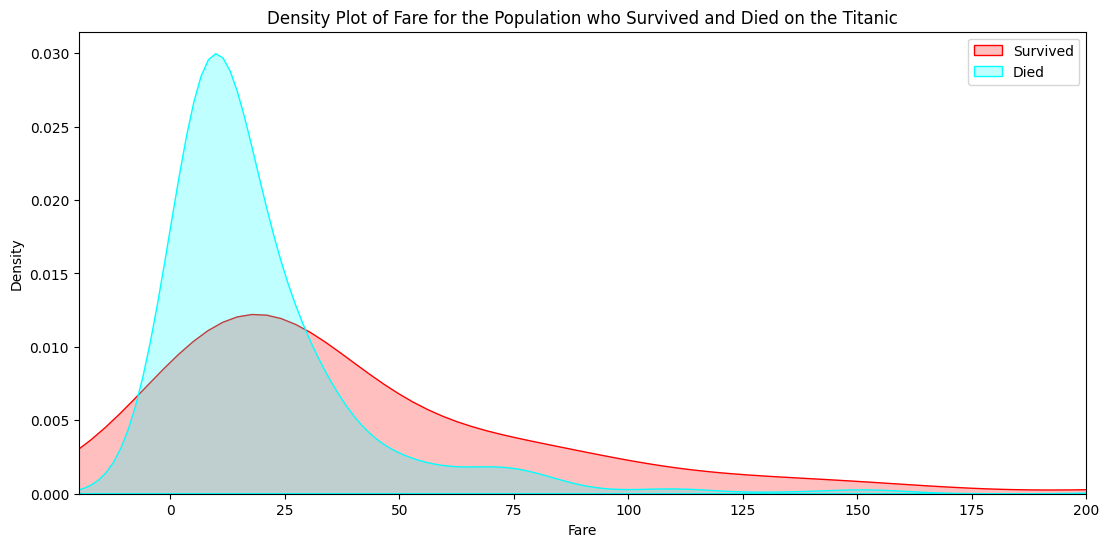

In [1503]:
plt.figure(figsize=(13,6))
ax = sns.kdeplot(final_train["Fare"][final_train.Survived == 1], color="red", shade=True)
sns.kdeplot(final_train["Fare"][final_train.Survived == 0], color="cyan", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Fare for the Population who Survived and Died on the Titanic')
ax.set(xlabel='Fare')
plt.xlim(-20,200)
plt.show()

It is clear from the above figures that the number of fatalities is significantly higher among passengers who were travelling in third class, that is, those who had also paid lower fares. Perhaps this also has some relation to the port at which they embarked, as the number of fatalities among those who embarked at Southampton is also significantly higher compared to the other ports.

## Logistic Regression ##


In [1504]:
final_train

,PassengerId,Survived,Pclass,Age,Fare,TravelAlone,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Age_bins,TravelAloneF
0,1,0,3,22.0,7.2500,0,1,0,0,1,adults,Accompanied
1,2,1,1,38.0,71.2833,0,0,1,0,0,adults,Accompanied
2,3,1,3,26.0,7.9250,1,0,0,0,1,adults,Alone
3,4,1,1,35.0,53.1000,0,0,0,0,1,adults,Accompanied
4,5,0,3,35.0,8.0500,1,1,0,0,1,adults,Alone
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,13.0000,1,1,0,0,1,adults,Alone
887,888,1,1,19.0,30.0000,1,0,0,0,1,adults,Alone
888,889,0,3,28.0,23.4500,0,0,0,0,1,adults,Accompanied
889,890,1,1,26.0,30.0000,1,1,1,0,0,adults,Alone


In [1505]:
final_test

,PassengerId,Survived,Pclass,Age,Fare,TravelAlone,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,0,3,34.5,7.8292,1,1,0,1,0
1,893,1,3,47.0,7.0000,0,0,0,0,1
2,894,0,2,62.0,9.6875,1,1,0,1,0
3,895,0,3,27.0,8.6625,1,1,0,0,1
4,896,1,3,22.0,12.2875,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,28.0,8.0500,1,1,0,0,1
414,1306,1,1,39.0,108.9000,1,0,1,0,0
415,1307,0,3,38.5,7.2500,1,1,0,0,1
416,1308,0,3,28.0,8.0500,1,1,0,0,1


In [1506]:
# selecting the features
X = ["Pclass","Age","Fare","TravelAlone","Sex_male","Embarked_C","Embarked_Q","Embarked_S"]
X_train = final_train[X]
y_train = final_train["Survived"]
X_test = final_test[X]
y_test = final_test["Survived"]

In [1507]:
# Standard Scaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [1508]:
# training the Logistic Regression model
model_LR = LogisticRegression(random_state=0, solver='lbfgs', max_iter=100)
model_LR.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [1509]:
# making the prediction
pred_LR = model_LR.predict(X_test)
pd.DataFrame({'Actual': y_test, 'Predicted': pred_LR})

,Actual,Predicted
0,0,0
1,1,0
2,0,0
3,0,0
4,1,1
...,...,...
413,0,0
414,1,1
415,0,0
416,0,0


In [1510]:
# evaluating the model accuracy
accuracy_LR = accuracy_score(y_test, pred_LR)

# confusion Matrix
conf_mat = confusion_matrix(y_test, pred_LR)

print('Accuracy:', round(accuracy_LR, 3), '\n')
print("Confusion Matrix:\n", conf_mat)

# precision, recall and F1-score
print(classification_report(y_test,pred_LR))


Accuracy: 0.95 

Confusion Matrix:
 [[251  15]
 [  6 146]]
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       266
           1       0.91      0.96      0.93       152

    accuracy                           0.95       418
   macro avg       0.94      0.95      0.95       418
weighted avg       0.95      0.95      0.95       418

